<a href="https://colab.research.google.com/github/zareefrj/Time-Series-Forecasting/blob/main/FB_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 59.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [ ]:
df = pd.read_csv('msw12-18.csv')
df.head()

,area,Date,waste_type,Amount
0,Boralesgamuwa UC,1/1/2012,MSW,17340
1,Boralesgamuwa UC,2/1/2012,MSW,25980
2,Boralesgamuwa UC,3/1/2012,MSW,29220
3,Boralesgamuwa UC,4/1/2012,MSW,7450
4,Boralesgamuwa UC,5/1/2012,MSW,10520


In [ ]:
df=df[["Date","Amount"]]
df.columns = ['ds','y'] #change column names for fb prophet
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

<ipython-input-4-e30a1c3ed80c>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['ds'] = pd.to_datetime(df['ds'])
<ipython-input-4-e30a1c3ed80c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


,ds,y
2983,2018-12-29,24390
2984,2018-12-29,1990
2985,2018-12-30,18960
2986,2018-12-31,40420
2987,2018-12-31,8150


<Axes: xlabel='ds'>

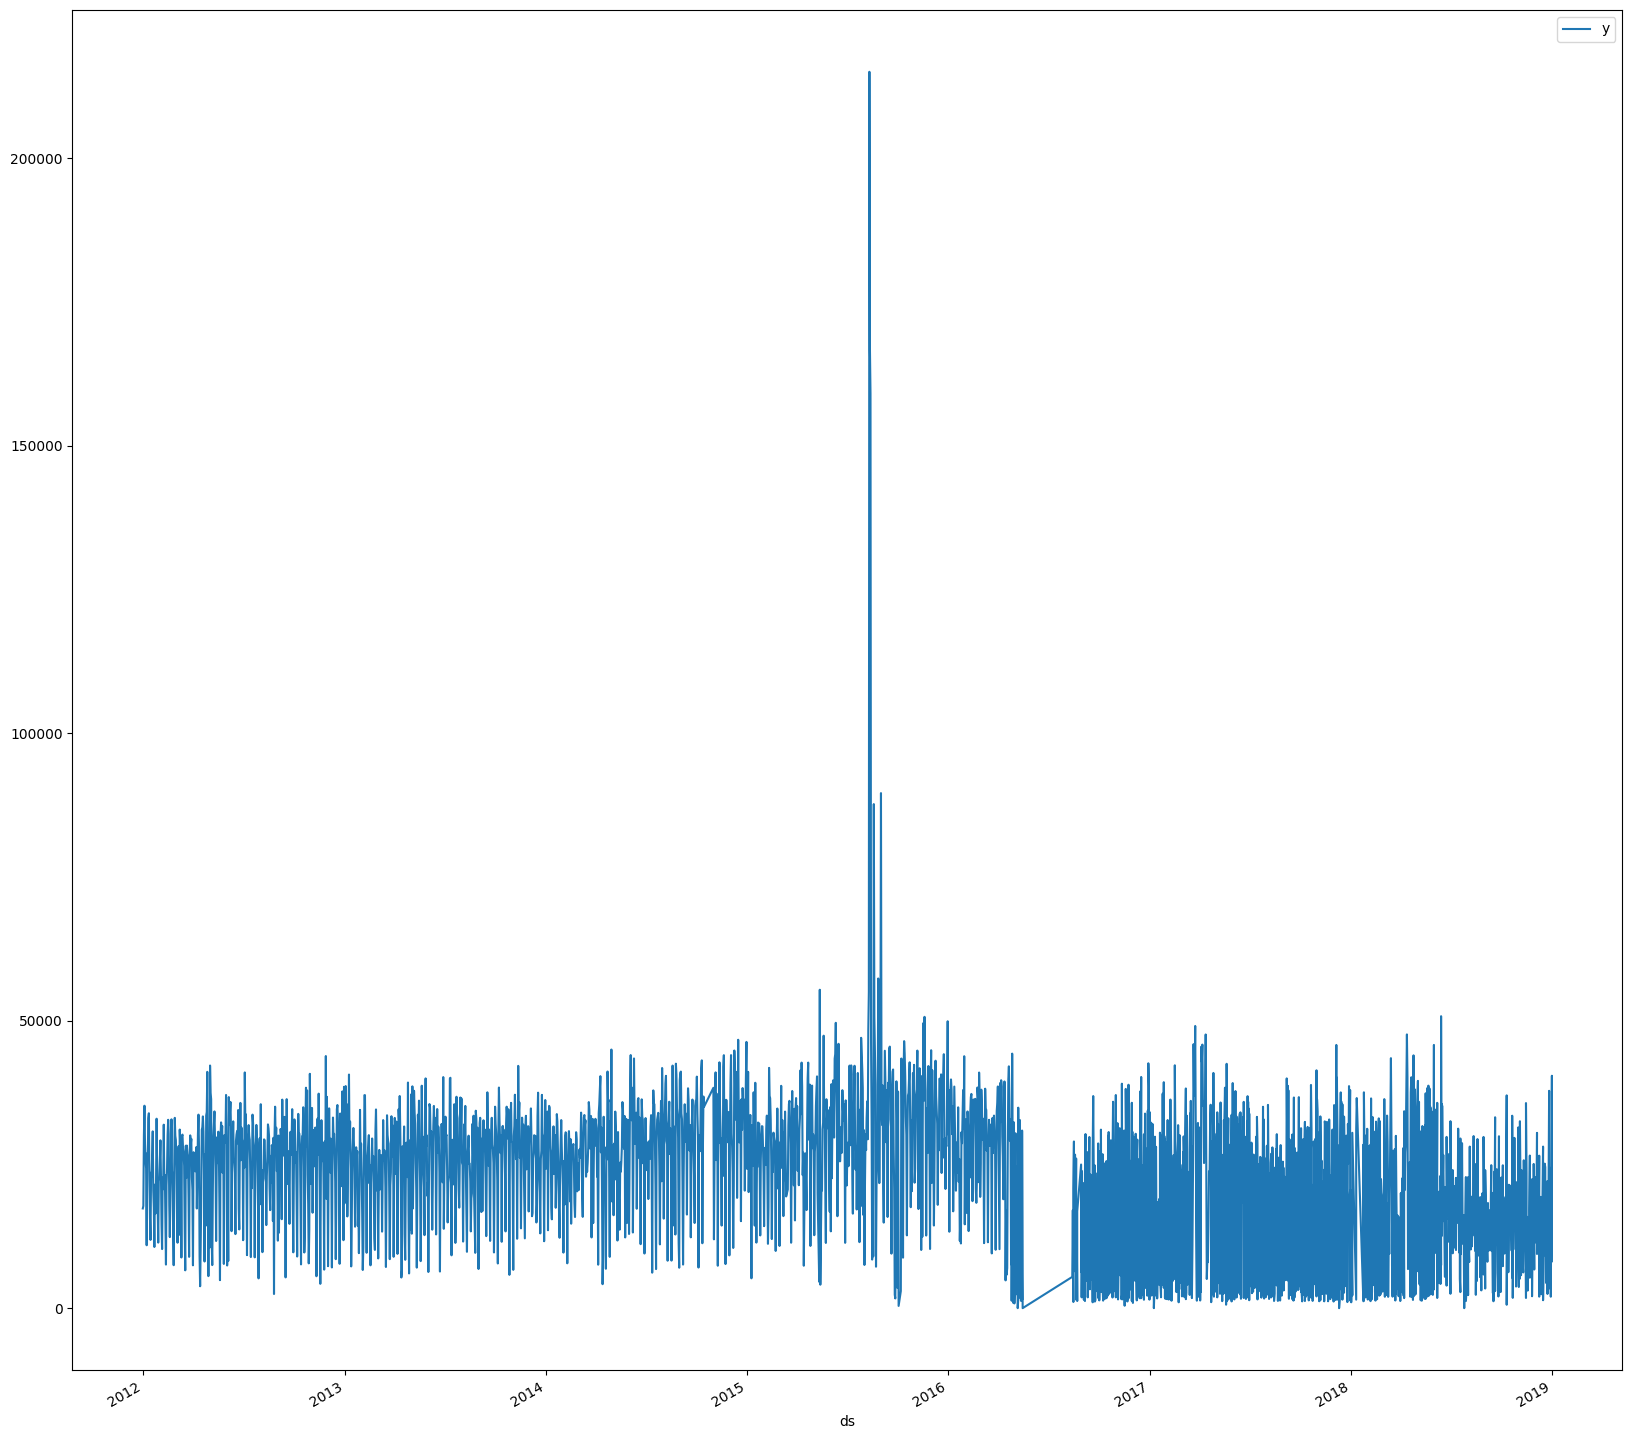

In [ ]:
df.plot(x='ds',y='y',figsize=(20,20))

In [43]:
m = Prophet(interval_width=0.95)
model = m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphs8xd5q3/m6tl3r6d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphs8xd5q3/9xhcn36f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29958', 'data', 'file=/tmp/tmphs8xd5q3/m6tl3r6d.json', 'init=/tmp/tmphs8xd5q3/9xhcn36f.json', 'output', 'file=/tmp/tmphs8xd5q3/prophet_model003_m3gd/prophet_model-20230615092948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:29:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:29:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [44]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,23397.857280,-5074.844187,35733.925564,23397.857280,23397.857280,-7392.013315,-7392.013315,-7392.013315,-9259.399130,-9259.399130,-9259.399130,1867.385815,1867.385815,1867.385815,0.0,0.0,0.0,16005.843965
1,2012-01-02,23401.953203,2558.605217,44727.679889,23401.953203,23401.953203,875.827651,875.827651,875.827651,-922.117323,-922.117323,-922.117323,1797.944975,1797.944975,1797.944975,0.0,0.0,0.0,24277.780854
2,2012-01-03,23406.049126,6813.586521,48745.120950,23406.049126,23406.049126,5517.736054,5517.736054,5517.736054,3819.925636,3819.925636,3819.925636,1697.810418,1697.810418,1697.810418,0.0,0.0,0.0,28923.785180
3,2012-01-04,23410.145049,8417.656289,48430.661693,23410.145049,23410.145049,5243.385279,5243.385279,5243.385279,3675.718424,3675.718424,3675.718424,1567.666854,1567.666854,1567.666854,0.0,0.0,0.0,28653.530328
4,2012-01-05,23414.240972,7951.773053,48336.117663,23414.240972,23414.240972,4223.360825,4223.360825,4223.360825,2814.505882,2814.505882,2814.505882,1408.854943,1408.854943,1408.854943,0.0,0.0,0.0,27637.601797


In [45]:
plot_plotly(m ,forecast)

In [46]:
plot_components_plotly(m, forecast)

In [48]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2512,2019-04-06,15285.922238,-6010.535465,37384.698420,14531.902406,16071.402424,-17.339578,-17.339578,-17.339578,-1273.311452,-1273.311452,-1273.311452,1255.971874,1255.971874,1255.971874,0.0,0.0,0.0,15268.582660
2513,2019-04-07,15284.236483,-12593.605191,27360.251639,14513.547110,16092.071237,-7967.226608,-7967.226608,-7967.226608,-9259.399130,-9259.399130,-9259.399130,1292.172521,1292.172521,1292.172521,0.0,0.0,0.0,7317.009874
2514,2019-04-08,15282.550728,-6355.120934,36855.001019,14495.191814,16112.740050,405.683128,405.683128,405.683128,-922.117323,-922.117323,-922.117323,1327.800451,1327.800451,1327.800451,0.0,0.0,0.0,15688.233856
2515,2019-04-09,15280.864973,1081.023421,39772.137674,14477.067454,16133.240490,5180.857675,5180.857675,5180.857675,3819.925636,3819.925636,3819.925636,1360.932040,1360.932040,1360.932040,0.0,0.0,0.0,20461.722648
2516,2019-04-10,15279.179218,-1408.219595,40767.010421,14459.083704,16141.265706,5065.170068,5065.170068,5065.170068,3675.718424,3675.718424,3675.718424,1389.451644,1389.451644,1389.451644,0.0,0.0,0.0,20344.349286


In [52]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='2190 days', period='30 days', horizon = '100 days')

INFO:prophet:Making 9 forecasts with cutoffs between 2018-01-25 00:00:00 and 2018-09-22 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmphs8xd5q3/2hgodkoa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphs8xd5q3/amufa558.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59953', 'data', 'file=/tmp/tmphs8xd5q3/2hgodkoa.json', 'init=/tmp/tmphs8xd5q3/amufa558.json', 'output', 'file=/tmp/tmphs8xd5q3/prophet_modelt0bep4kx/prophet_model-20230615094654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:46:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:46:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmphs8xd5q3/211833b9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphs8xd5q3/0ab9x70b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [53]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,11 days,1.245553e+08,11160.435237,9461.788050,0.526559,0.685346,0.960833
1,12 days,1.247836e+08,11170.659861,9493.712960,0.518231,0.678043,0.960000
2,13 days,1.235871e+08,11116.972437,9418.295413,0.504397,0.658132,0.960000
3,14 days,1.226760e+08,11075.917688,9336.083937,0.475086,0.646309,0.960000
4,15 days,1.233025e+08,11104.163834,9400.064394,0.482013,0.645977,0.960000


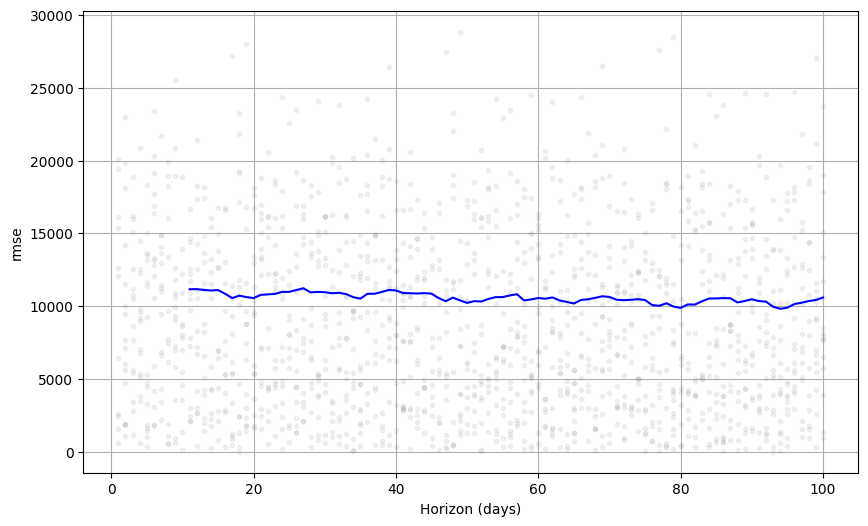

In [55]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')